Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

https://cooltools.readthedocs.io/en/latest/notebooks/


# Подготовка

In [ ]:
%%bash
pip install cooler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=ddcce3ba41c530e68bc9ae10fdb08728d01eb8df133cb7ac0b0e4dfde6148187
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [ ]:
import cooler

In [ ]:
%%bash
pip install cooltools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 17.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.2/145.2 kB 9.3 MB/s eta 0:00:00
  Created wheel for cooltools: filename=cooltools-0.7.0-cp310-cp310-linux_x86_64.whl size=474786 sha256=5560b656024d201f1c0df4b8d12151f00b1bc86cfae8735af7e01ce08c7ee934
  Stored in directory: /root/.cache/pip/wheels/be/87/cd/25f3db25eee256e62605f1f563bcd0dd33adb5fa782f1e1ec6
Successfully built cooltools


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe

TADs and calling

In [ ]:
import cooltools
from cooltools import insulation
import cooltools.lib.plotting

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
mcool = []
for i in range(4):
  mcool.append(f'/content/Drive/MyDrive/hic/HiC{i+1}.dm3.mapq_30.1000.mcool')

Boundaries calling

In [ ]:
resolution = 10000
clr = []
for i in range(4):
  clr.append(cooler.Cooler(f'{mcool[i]}::resolutions/{resolution}'))

# получить информацию и атрибуты матрицы Hi-C с помощью cooler.info


In [ ]:
clr[1].info


{'bin-size': 10000,
 'bin-type': 'fixed',
 'creation-date': '2023-04-06T04:16:30.289988',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 12044,
 'nchroms': 7,
 'nnz': 11522171,
 'storage-mode': 'symmetric-upper',
 'sum': 61819050}

# открыть объект cooler как сбалансированную матрицу для внутрихромосомных контактов


---



In [ ]:
m=clr[1].matrix(balance = True).fetch('chr3R')

In [ ]:
m

array([[2.41219957e+00, 4.37083845e-01, 1.22207854e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [4.37083845e-01, 5.16043497e+00, 2.39133258e-01, ...,
        0.00000000e+00, 0.00000000e+00,            nan],
       [1.22207854e-01, 2.39133258e-01, 1.33827398e+00, ...,
        4.28228486e-04, 0.00000000e+00,            nan],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.28228486e-04, ...,
        8.44791171e-01, 1.64495386e-01,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.64495386e-01, 7.08176351e-01,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

#  получить таблицу с координатами и контактами, они сбалансированные или нет?

In [ ]:
pix=clr[1].pixels()[:]

In [ ]:
pix

,bin1_id,bin2_id,count
0,0,0,1513
1,0,1,324
2,0,2,90
3,0,3,43
4,0,4,45
...,...,...,...
11522166,12040,12040,1056
11522167,12040,12041,18
11522168,12041,12041,160
11522169,12042,12042,66


нет

# посмотрите таблицу с бинами, какие столбцы там присутствуют?


In [ ]:
bins=clr[1].bins()[:]

In [ ]:
bins

,chrom,start,end,weight
0,chr2L,0,10000,0.029308
1,chr2L,10000,20000,0.016690
2,chr2L,20000,30000,0.014282
3,chr2L,30000,40000,0.016056
4,chr2L,40000,50000,0.023116
...,...,...,...,...
12039,chrX,22400000,22410000,NaN
12040,chrX,22410000,22420000,0.035573
12041,chrX,22420000,22422827,NaN
12042,chrM,0,10000,1.949176


Хромосома где находится участок, его начало, конец и вес на который домножается число контактов при нормировании

In [ ]:
import numpy as np

<ipython-input-19-c711f0d94e38>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m[500 : 650, 500 : 650]),cmap='coolwarm')


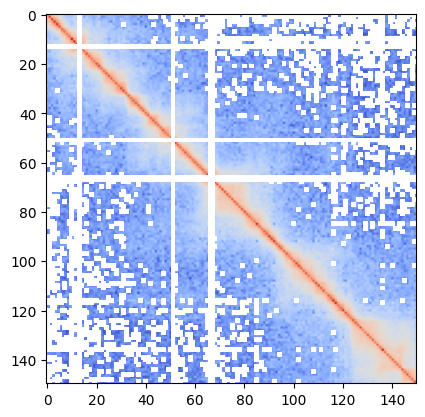

In [ ]:
plt.imshow(np.log(m[500 : 650, 500 : 650]),cmap='coolwarm')

# постройте кривые зависимости число контактов от расстояния для выбранной хромосомы (в логарифмических-координатах) для 4х реплик. Сравните их.

In [ ]:
m = []
zz = []
for j in range(4):
  m.append(clr[j].matrix(balance = True).fetch('chr3R'))
  z=np.zeros(len(m[j]))
  for i in range(len(m[j])):
    z[i]=np.nanmean(np.diagonal(m[j],i))
  zz.append(z)

<ipython-input-20-3f1808e4ba81>:7: RuntimeWarning: Mean of empty slice
  z[i]=np.nanmean(np.diagonal(m[j],i))


<ipython-input-51-cbf64bc7b93f>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.arange(len(m[j]))*20000,np.log(zz[j]))


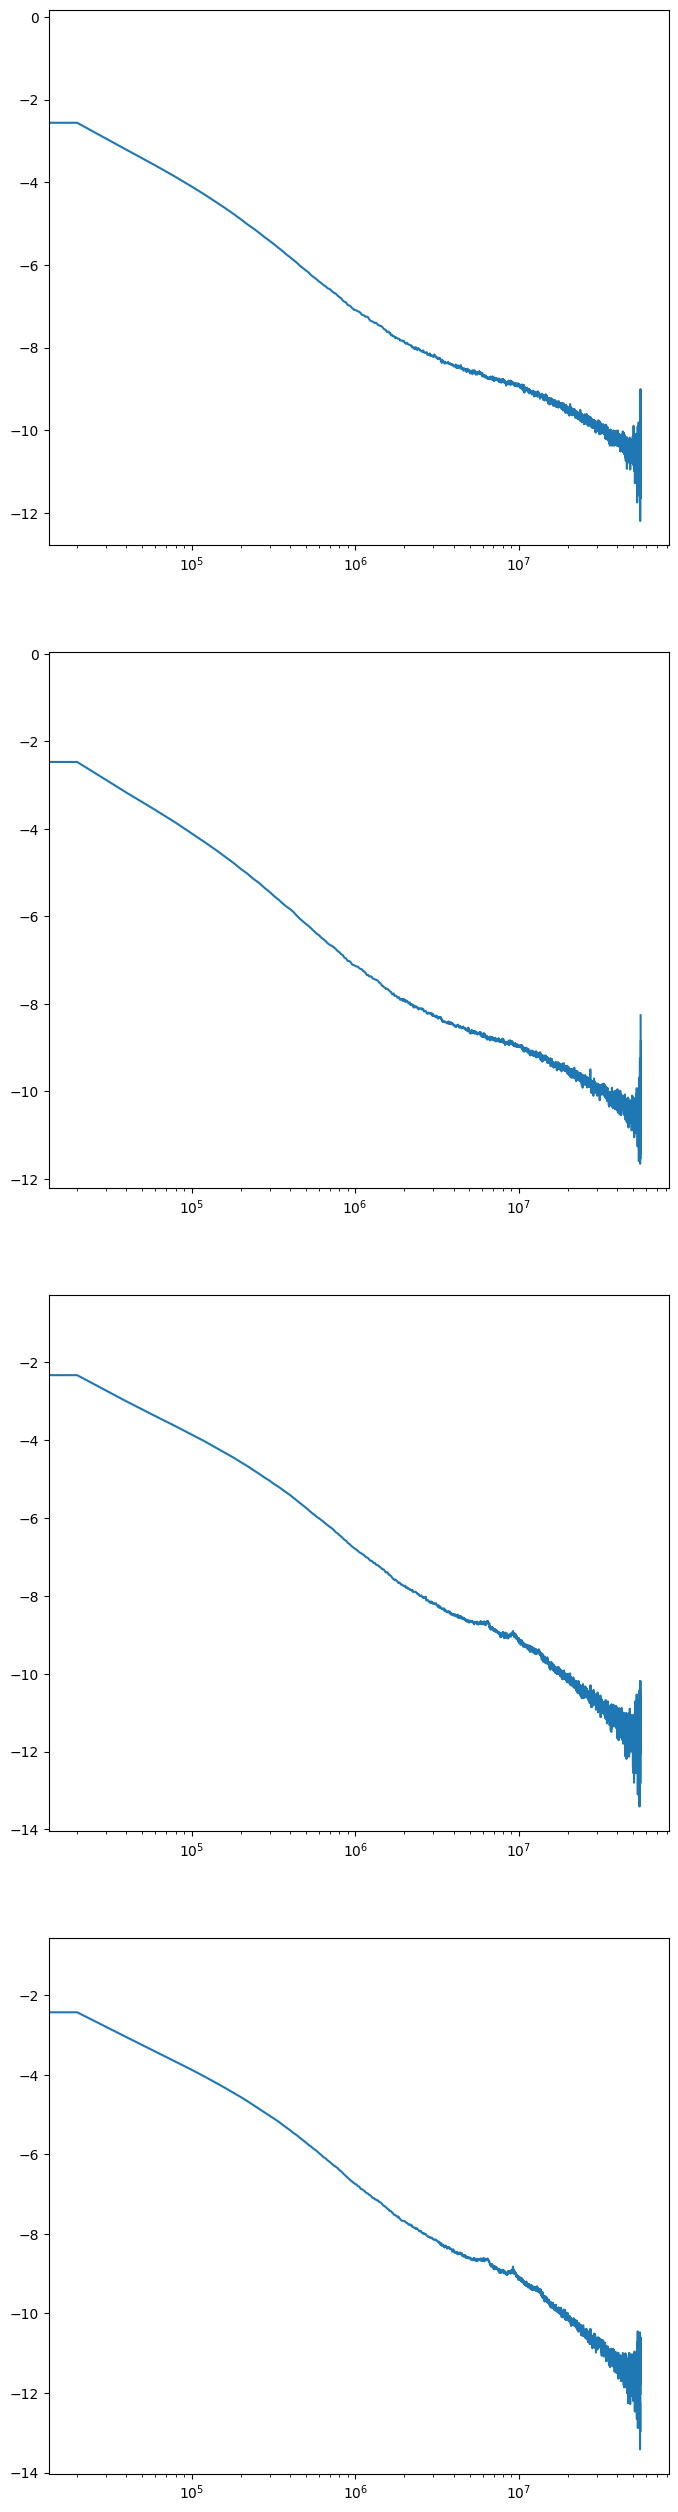

In [ ]:
plt.figure(figsize=(8, 32))
for j in range(4):
  plt.subplot(4, 1, j+1)
  plt.plot(np.arange(len(m[j]))*20000,np.log(zz[j]))
  plt.xscale('log')
plt.show()

# для выбранного участка найдите insulation score и границы тадов для всех реплик

In [ ]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


In [ ]:
windows = [3*resolution,5*resolution, 10*resolution]
insulation_table = []
for i in range(4):
  insulation_table.append(insulation(clr[i], windows, verbose=True))

(5000000.0, 6500000.0)

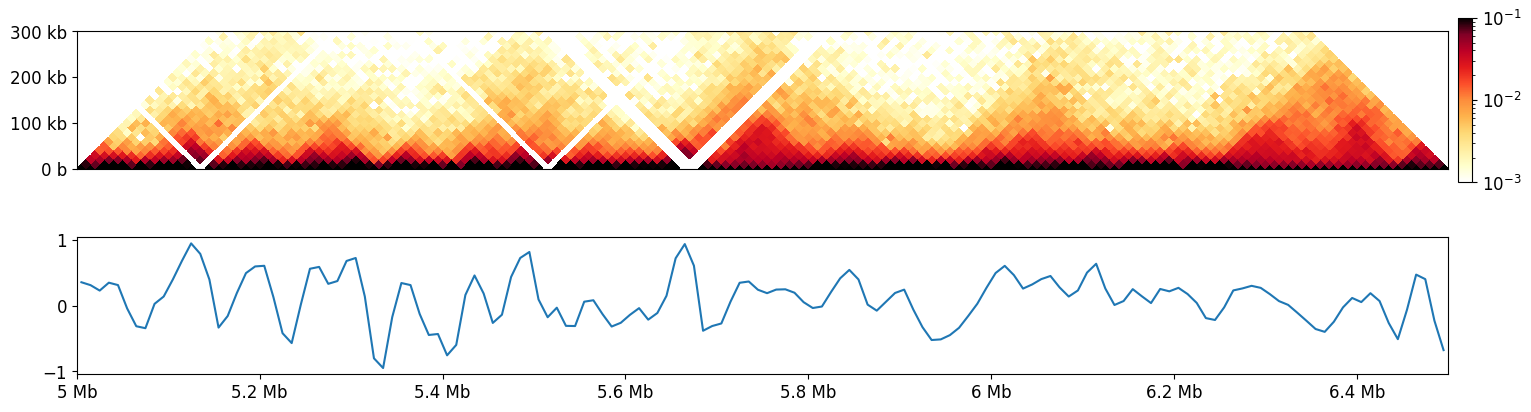

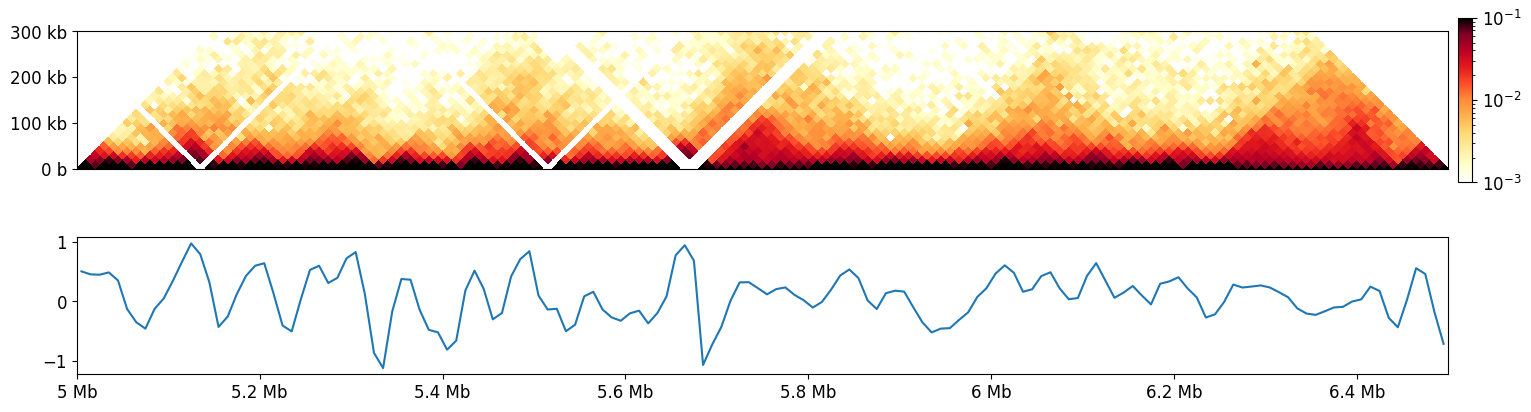

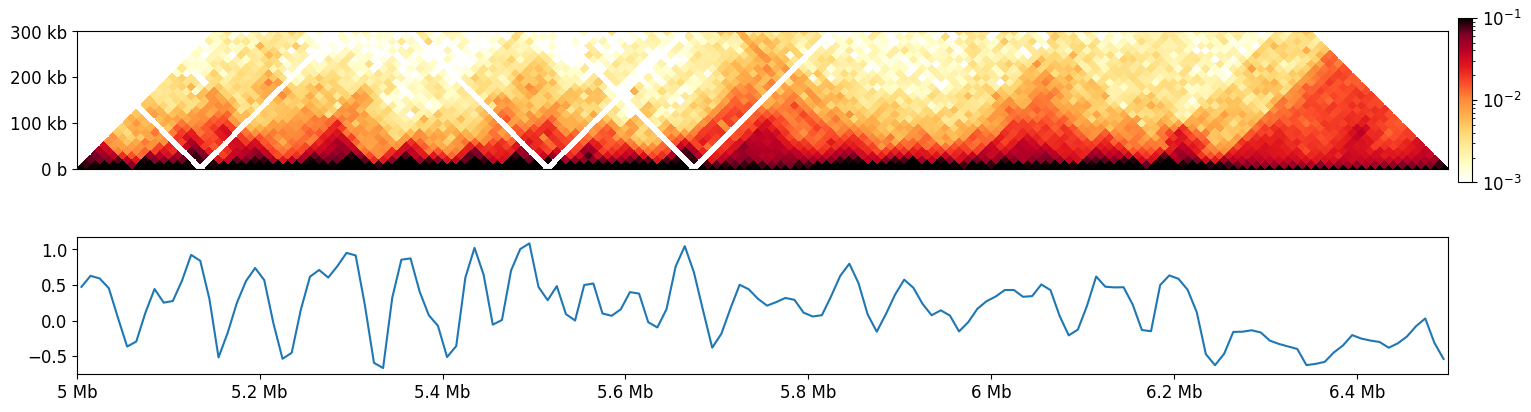

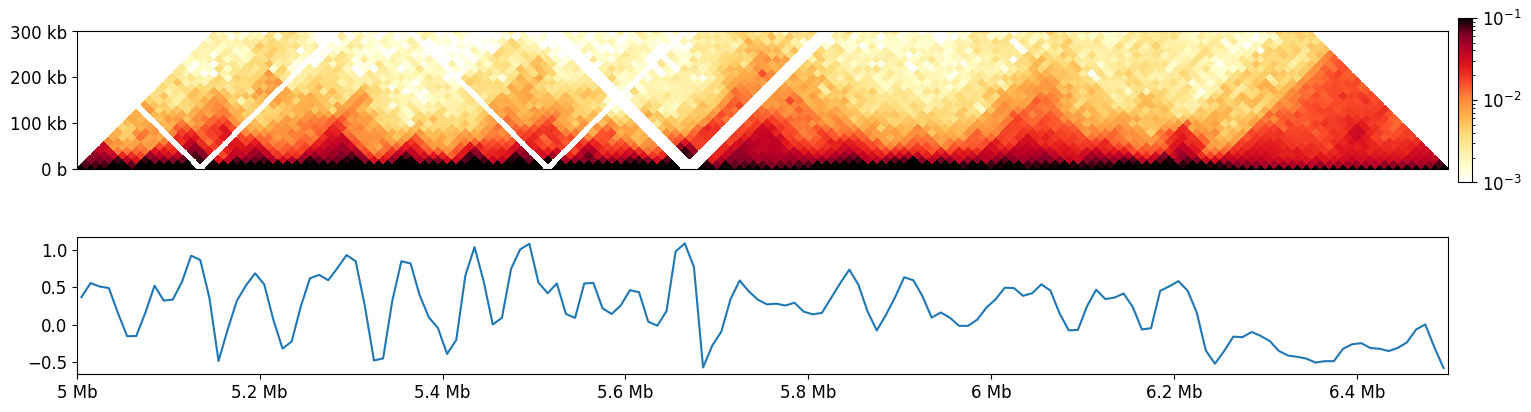

In [ ]:

plt.rcParams['font.size'] = 12

start = 5_000_000
end = start+ 50*windows[0]
region = ('chr3R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = []
for j in range(4):
  data.append(clr[j].matrix(balance=True).fetch(region))
  f, ax = plt.subplots(figsize=(18, 6))
  im = pcolormesh_45deg(ax, data[j], start=region[1], resolution=resolution, norm=norm, cmap='fall')
  ax.set_aspect(0.5)
  ax.set_ylim(0, 10*windows[0])
  format_ticks(ax, rotate=False)
  ax.xaxis.set_visible(False)

  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
  plt.colorbar(im, cax=cax)

  ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
  insul_region = bioframe.select(insulation_table[j], region)
  ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
              insul_region['log2_insulation_score_'+str(windows[0])])

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

# сравните результаты и постройте графики полученных кривых. Отобразите на них границы  ТАДов.


(5000000.0, 6500000.0)

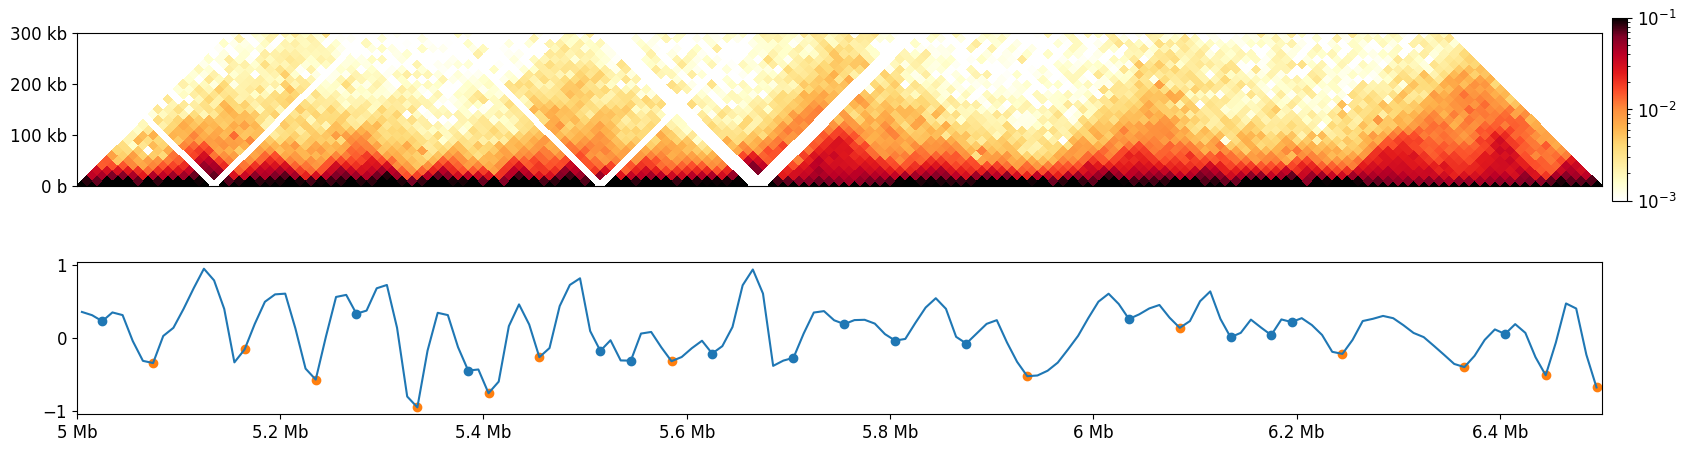

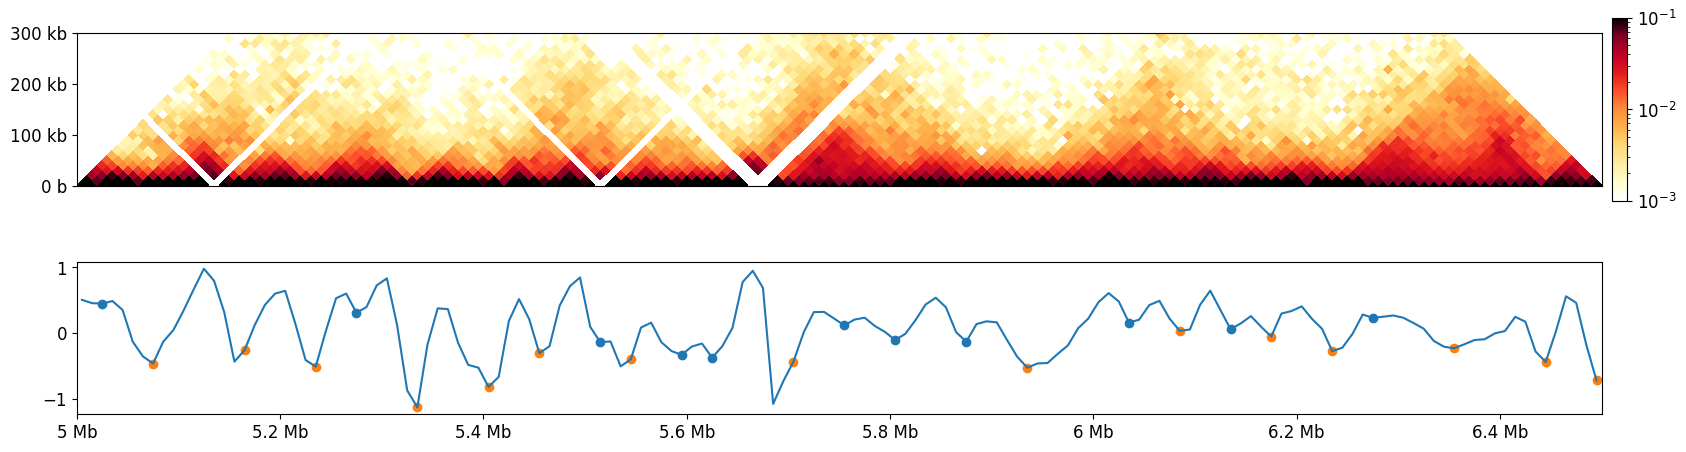

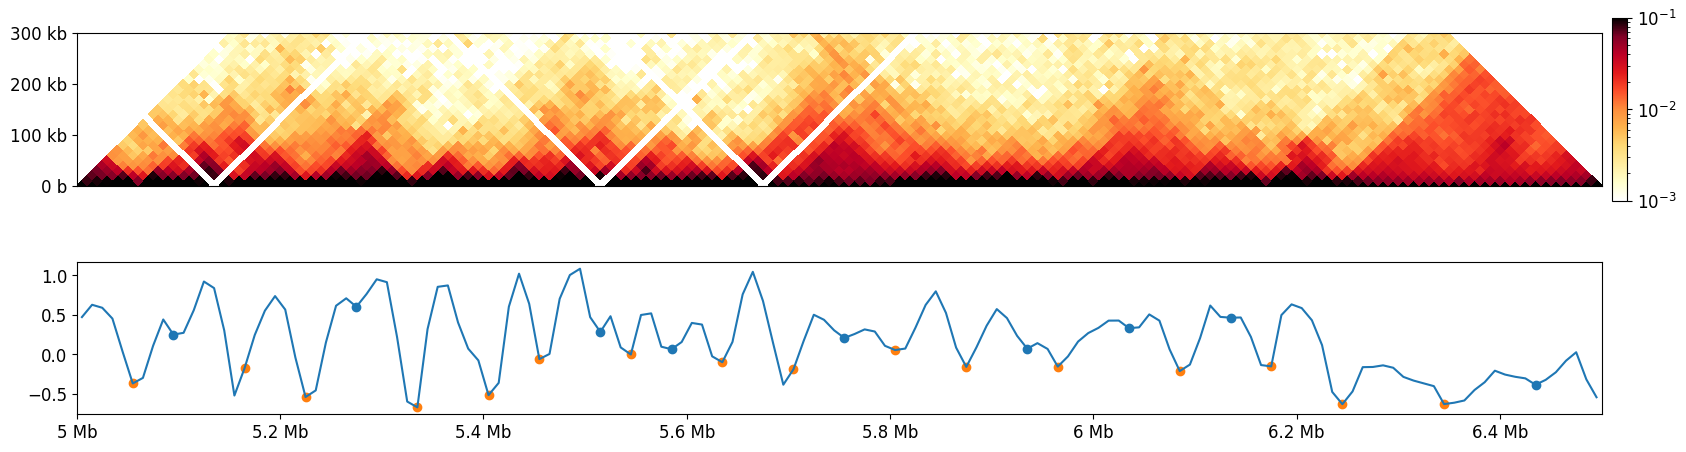

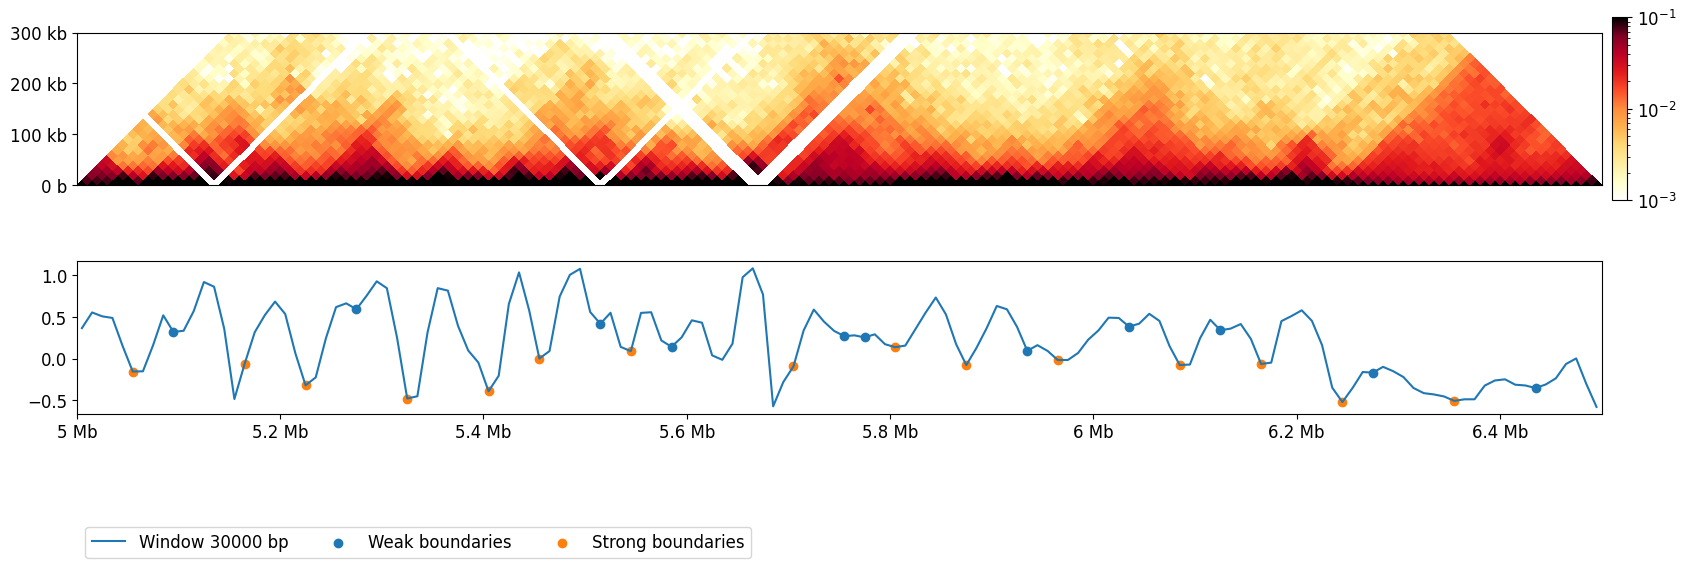

In [ ]:
weak_boundaries = []
strong_boundaries = []

for j in range(4):

  f, ax = plt.subplots(figsize=(20, 10))
  ax.set_aspect(0.5)
  ax.set_ylim(0, 10*windows[0])
  format_ticks(ax, rotate=False)
  ax.xaxis.set_visible(False)

  im = pcolormesh_45deg(ax, data[j], start=region[1], resolution=resolution, norm=norm, cmap='fall')
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
  plt.colorbar(im, cax=cax)

  insul_region = bioframe.select(insulation_table[j], region)

  ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

  ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

  boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
  weak_boundaries.append(boundaries[~boundaries[f'is_boundary_{windows[0]}']])
  strong_boundaries.append(boundaries[boundaries[f'is_boundary_{windows[0]}']])
  ins_ax.scatter(weak_boundaries[j][['start', 'end']].mean(axis=1),
            weak_boundaries[j][f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
  ins_ax.scatter(strong_boundaries[j][['start', 'end']].mean(axis=1),
            strong_boundaries[j][f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')



ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

# Создайте 4 bed файла с границами ТАДов.В поле score добавьте силу границы

In [ ]:

import pandas as pd

In [ ]:
boundaries = []
for j in range(4):
  a = weak_boundaries[j][['chrom',	'start',	'end']]
  a['score'] = 'weak'
  b = strong_boundaries[j][['chrom',	'start',	'end']]
  b['score'] = 'strong'
  c = pd.concat([a, b])
  c.sort_values(by=['start'])
  boundaries.append(c)

<ipython-input-131-cb27490f6fc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['score'] = 'weak'
<ipython-input-131-cb27490f6fc5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['score'] = 'strong'
<ipython-input-131-cb27490f6fc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [ ]:
boundaries[0]

,chrom,start,end,score
7374,chr3R,5020000,5030000,weak
7399,chr3R,5270000,5280000,weak
7410,chr3R,5380000,5390000,weak
7423,chr3R,5510000,5520000,weak
7426,chr3R,5540000,5550000,weak
7434,chr3R,5620000,5630000,weak
7442,chr3R,5700000,5710000,weak
7447,chr3R,5750000,5760000,weak
7452,chr3R,5800000,5810000,weak
7459,chr3R,5870000,5880000,weak


In [ ]:
for j in range(4):
  lines = []
  with open(f'/content/data/boundaries{j}.bed', 'w') as f:
    for i in boundaries[j].index:
      line = f"{boundaries[j].loc[i]['chrom']} \t {boundaries[j].loc[i]['start']} \t {boundaries[j].loc[i]['end']} \t {boundaries[j].loc[i]['score']} \n"
      f.write(line)
